# Setups

## Accessing drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# list what is inside
!ls "/gdrive/My Drive/Colab Notebooks"

# or can use:
# import os
# os.chdir("/gdrive/My Drive/Colab Notebooks")
# !ls

 BTK_Keras_0.ipynb		  'ML BTK-2.ipynb'
 classes.ipynb			  'ML BTK-3.ipynb'
 Create_Neural_Network.ipynb	  'ML BTK-4.ipynb'
 Creating_CNN.ipynb		  'ML BTK-5.ipynb'
 Creating_RNN.ipynb		  'ML BTK-6.ipynb'
 data_cleaning.ipynb		  'ML BTK-7.ipynb'
 ele_bele.ipynb			  'ML BTK-8.ipynb'
 GlobalAI_Project_CNN.ipynb	  'ML BTK-9.ipynb'
 GlobalAI_Project_DataPrep.ipynb   ML_BTK_Homework_2.ipynb
 lists.ipynb			   ML_BTK_Homework_3.ipynb
 matplot.ipynb			  'ML BTK Homework.ipynb'
'ML BTK-1.ipynb'		   Pandas.ipynb


## Viewing GPU/CPU/Memory

In [ ]:
# CPU info
!cat /proc/cpuinfo

# Memory info
!cat /proc/meminfo

In [ ]:
# GPU info
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8697957334095266507
 xla_global_id: -1]

In [ ]:
# View hub
import tensorflow_hub as hub

One line if statement example:

`print("available" if tf.test.is_gpu_available() else "Not available")`

## Restart collab

In [ ]:
!kill -9 -1

## Use .py files in collab

go to where py file is in drive using:

```
import os
os.chdir("/gdrive/My Drive/Colab Notebooks")
```

then

`!python3 py_file_in_colab.py `

## CLEAN MEMORY IN PYTHON

Garbage collector:
```
import gc

gc.collect()
```

Clean all variables:
```
%reset -f
```




# MATH

In BTK Keras 3.6 well explained in Turkish.

## What is a tensor?

Tensor is multidimensional type of matrixes.

**Matrix has rows and columns.**

**Tensor has rows, columns and channels.**




In [ ]:
import numpy as np

x = np.array(7)

# observe dimensions:
print(x.ndim)  # will give 0 since it's a SCALAR number

x = np.array([7, 14, 21])
print(x.ndim)  # will give 1

x = np.array([[7, 14, 21],
             [7, 14, 21],
             [7, 14, 21]])
print(x.ndim)  # it will be a MATRIX

x = np.array([[[7, 14, 21],[7, 14, 21]],
             [[7, 14, 21],[7, 14, 21]],
             [[7, 14, 21],[7, 14, 21]]])
print(x.ndim)  # it will be a TENSOR

0
1
2
3


## Example from image data

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


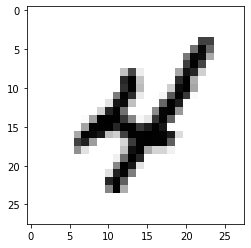

In [ ]:
digit = train_images[9]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
plt.close()

In [ ]:
my_set = train_images[7:77]
print(my_set.shape)

# take cropped:
my_set = train_images[7:77, 0:14, 0:14]
print(my_set.shape)

(70, 28, 28)
(70, 14, 14)


## Operations

### By elementwise:

In [ ]:
def naive_add(x, y):
  assert len(x.shape) == 2  # x and y are 2 dimensional numpy tensors
  assert x.shape == y.shape

  x = x.copy()

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [ ]:
x = np.array([[7, 14, 21],
             [7, 14, 21],
             [7, 14, 21]])

y = np.array([[2, 2, 2],
             [2, 2, 2],
             [2, 2, 2]])

z = naive_add(x, y)
print(z)

[[ 9 16 23]
 [ 9 16 23]
 [ 9 16 23]]


In [ ]:
import numpy as np
z = x+y
z

array([[ 9, 16, 23],
       [ 9, 16, 23],
       [ 9, 16, 23]])

In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2

  x = x.copy()

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [ ]:
y = np.array([[2, -2, 2],
             [2, -2, 2],
             [2, -2, 2]])

z = naive_relu(y)
print(z)

[[2 0 2]
 [2 0 2]
 [2 0 2]]


In [ ]:
z = np.maximum(y, 0)
print(z)

[[2 0 2]
 [2 0 2]
 [2 0 2]]


### Spreading Opeartion (yayma operasyonu):

spread => matrix * vector

In [ ]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x

In [ ]:
x = np.array([[7,3,8], [1, 2, 3], [5, 5, 5]])
print(x.ndim)
y = np.array([1, 2, 3])

naive_add_matrix_and_vector(x, y)

2


array([[ 8,  5, 11],
       [ 2,  4,  6],
       [ 6,  7,  8]])

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)
print(z.shape)

(64, 3, 32, 10)


### Dot Product

In [ ]:
x = np.array([[1,2],
              [1,2]])

y = np.array([[1,2],
              [1,2]])

z = np.dot(x, y)
z

array([[3, 6],
       [3, 6]])

### Channel/Shape Changing

In [ ]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((1,-1))
x

array([[0., 1., 2., 3., 4., 5.]])

In [ ]:
x = np.zeros((100,10))
x = np.transpose(x)

print(x.shape)

(10, 100)


# Mnist Dataset Easy Example

## Download dataset

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Building Architecture For Minst

In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

network.compile(optimizer="rmsprop", 
                loss="categorical_crossentropy",
                metrics=['accuracy'])

network.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Preparing inputs and labels

In [ ]:
train_images = train_images.reshape((60000, 28*28))
# image normalization:
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Training model

In [ ]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 0.2539 - accuracy: 0.9263
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1014 - accuracy: 0.9698
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0677 - accuracy: 0.9798
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0499 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0375 - accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0289 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0219 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0171 - accuracy: 0.9951
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0130 - accuracy: 0.9961
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0102 - accuracy: 0.9972

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test loss: ", test_loss)
print("test accuracy: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9822
test loss:  0.07103368639945984
test accuracy:  0.982200026512146


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Layers/Models

Note: Tensorflow playground.

## Layer

In [ ]:
from keras import layers
layer = layers.Dense(32, input_shape=(784,))

## Model

In [ ]:
from keras import models
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

model.summary()

# Activation Functions

Drawing activation functions using matplotlib.

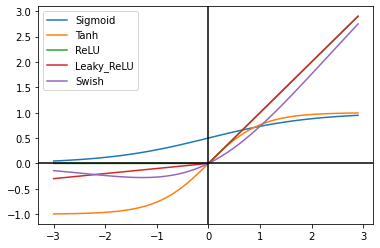

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid
def sigmoid(x):
  a = []
  for i in x:
    a.append(1/(1+math.exp(-i)))
  return a

# Hyperbolic tangent
def tanh(x, derivative=False):
  if (derivative==True):
    return (1-(x**2))
  return np.tanh(x)

# ReLU
def re(x):
  b = []
  for i in x:
    if i<0:
      b.append(0)
    else:
      b.append(i)
  return b

# Leaky ReLU
def lr(x):
  b = []
  for i in x:
    if i<0:
      b.append(i/10)
    else:
      b.append(i)
  return b

# Swish
# swish = sig*x


# ranges for creating graphs
x = np.arange(-3., 3., 0.1)
sig = sigmoid(x)
tanh = tanh(x)
relu = re(x)
leaky_relu = lr(x)
swish = sig*x


# Draw Graphs

line_1, = plt.plot(x, sig, label="Sigmoid")
line_2, = plt.plot(x, tanh, label="Tanh")
line_3, = plt.plot(x, relu, label="ReLU")
line_4, = plt.plot(x, leaky_relu, label="Leaky_ReLU")
line_5, = plt.plot(x, swish, label="Swish")

plt.legend(handles=[line_1, line_2, line_3, line_4, line_5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()
plt.close()